In [12]:
print("hola")

hola


In [13]:
import sympy
from sympy import sin, symbols, cos, pi

#variables simbolicas
x = sympy.symbols('x')
y = sympy.symbols('y')
L1 = sympy.symbols('L_1')
L2 = sympy.symbols('L_2')
#definir angulos de los eslabones
t1=sympy.symbols('tetha_1')
t2=sympy.symbols('tetha_2')
#longitud del eslabon

x=L1*cos(t1)+L2*cos(t1+t2)
print(x)
y=L1*sin(t1)+L2*sin(t1+t2)
print(y)

x_position=x.subs({L1:5,L2:3})
print(x_position)

y_position=y.subs({L1:5,L2:3})
print(y_position)




#print(x_position.subs({t1:pi/4,t2:pi/8}))
#print(y_position.subs({t1:pi/4,t2:pi/8}))




L_1*cos(tetha_1) + L_2*cos(tetha_1 + tetha_2)
L_1*sin(tetha_1) + L_2*sin(tetha_1 + tetha_2)
5*cos(tetha_1) + 3*cos(tetha_1 + tetha_2)
5*sin(tetha_1) + 3*sin(tetha_1 + tetha_2)


In [3]:

px=symbols('px')
py=symbols('py')

eq1=x_position-px
print(eq1)

eq2=y_position-py
print(eq2)

solution=sympy.solve([eq1,eq2],(t1,t2))
print(solution)

-px + 5*cos(tetha_1) + 3*cos(tetha_1 + tetha_2)
-py + 5*sin(tetha_1) + 3*sin(tetha_1 + tetha_2)


KeyboardInterrupt: 

In [14]:
t2_sol=sympy.acos((px**2+py**2-25-9)/(2*5*3))
print(t2_sol)

acos(px**2/30 + py**2/30 - 17/15)


In [15]:
from sympy import atan2, sqrt
sympy.N(t2_sol.subs({px:3*sqrt(sqrt(2)/4+1/2)+5*sqrt(2)/2,py:3*sqrt(sqrt(2)/4+1/2)+5*sqrt(2)/2}).evalf()*180/pi)

Rotaciones

Eje Z + ejm

In [3]:
import sympy
from sympy import sin, symbols, cos, pi, Matrix


In [14]:
sympy.init_printing(use_unicode=True)

In [4]:
t=symbols('theta')
#t=0
R=Matrix([[cos(t),-sin(t)],[sin(t),cos(t)]])
R

Matrix([
[cos(theta), -sin(theta)],
[sin(theta),  cos(theta)]])

In [29]:
p0=Matrix([[3],[5]])
p1=R*p0
print(p1)

Matrix([[-5*sin(tetha) + 3*cos(tetha)], [3*sin(tetha) + 5*cos(tetha)]])


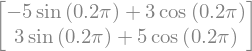

In [30]:
p1=p1.subs(t,0.2*pi)
p1


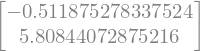

In [31]:
p1.subs(t,0.2*pi).evalf()

Rz

In [5]:
p0=Matrix([[3],[5],[0]])
Rz=Matrix([[cos(t),-sin(t),0],[sin(t),cos(t),0],[0,0,1]])
Rz

Matrix([
[cos(theta), -sin(theta), 0],
[sin(theta),  cos(theta), 0],
[         0,           0, 1]])

Rx

In [6]:
Rx=Matrix([[1,0,0],[0,cos(t),-sin(t)],[0,sin(t),cos(t)]])
Rx

Matrix([
[1,          0,           0],
[0, cos(theta), -sin(theta)],
[0, sin(theta),  cos(theta)]])

Ry

In [7]:
Ry=Matrix([[cos(t),0,sin(t)],[0,1,0],[-sin(t),0,cos(t)]])
Ry

Matrix([
[ cos(theta), 0, sin(theta)],
[          0, 1,          0],
[-sin(theta), 0, cos(theta)]])

Ejemplos

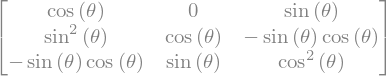

In [41]:
Rx*Ry

In [44]:
p0=Matrix([[3],[5],[2]])
p0

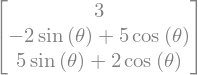

In [46]:
p1=Rx*p0
p1

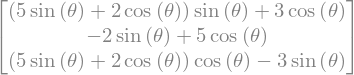

In [47]:
p1=Ry*(Rx*p0)
p1

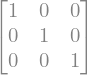

In [49]:
Rx.subs(t,pi/2)*Rx.subs(t,-pi/2)


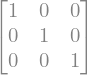

In [50]:
Ry.subs(t,pi/2)*Ry.subs(t,-pi/2)

In [8]:
L=Matrix([[0.4],[0],[0]])
L

Matrix([
[0.4],
[  0],
[  0]])

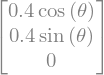

In [86]:
L1=Rz*L
L1

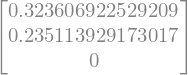

In [88]:
L1=L1.subs(t,0.6283179999999997)
L1


In [11]:
L2=Rz.subs(t,0.6283179999999997)*Ry*L
#L2
L2.subs(t,-(0.35688462399999965)).evalf()

Matrix([
[0.303216368433519],
[0.220299340986882],
[0.139742743191674]])

In [10]:
L2=Rz.subs(t,-0.5409817980000002)*Ry*L
#L2
L2.subs(t,-(-2.5999798839999997)).evalf()

Matrix([
[-0.293807656419697],
[ 0.176509351738218],
[-0.206207443556531]])

El orden importa, ejemplo anterior es L2 = Rz * Ry * L y se define un theta unico para cada uno.pstd El SIGNO de los valores de los joints deben de ser acorde a la ley de la mano derecha.

Denavit Hartenberg Representation

In [ ]:
d=symbols('d') #distancia a lo largo de z a interseccion de x 
a=symbols('a') #distancia a lo largo de x a interseccion de z
aph=symbols('alpha') #
t=symbols('theta') #rotacion en z


Rz=Matrix([[cos(t),-sin(t),0,0],[sin(t),cos(t),0,0],[0,0,1,0],[0,0,0,1]])
Tz=Matrix([[1,0,0,0],[0,1,0,0],[0,0,1,d],[0,0,0,1]])

Tx=Matrix([[1,0,0,a],[0,1,0,0],[0,0,1,0],[0,0,0,1]])
Rx=Matrix([[1,0,0,0],[0,cos(aph),-sin(aph),0],[0,sin(aph),cos(aph),0],[0,0,0,1]])

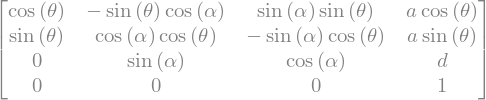

In [19]:
A=Rz*Tz*Tx*Rx
A